In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="hmWwD633kHXznyTfDqQS")
# project = rf.workspace("roboflow-gw7yv").project("self-driving-car")
# version = project.version(2)
# dataset = version.download("tensorflow")

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Self-Driving-Car-2/export/_annotations.csv')
df

filename  width  height  \
0       1478896675854777963_jpg.rf.33e1b02178c86ae9d5f...   1920    1200   
1       1478896675854777963_jpg.rf.33e1b02178c86ae9d5f...   1920    1200   
2       1478896675854777963_jpg.rf.33e1b02178c86ae9d5f...   1920    1200   
3       1478896675854777963_jpg.rf.33e1b02178c86ae9d5f...   1920    1200   
4       1478896675854777963_jpg.rf.33e1b02178c86ae9d5f...   1920    1200   
...                                                   ...    ...     ...   
195879  1478897829860516683_jpg.rf.zyu7Utzjz24nr2MuERo...   1920    1200   
195880  1478897829860516683_jpg.rf.zyu7Utzjz24nr2MuERo...   1920    1200   
195881  1478895724086542119_jpg.rf.zza9XgOQ3gkF0g2SFUd...   1920    1200   
195882  1478898482845233189_jpg.rf.zy6DHWCqjNvTpVMmDQH...   1920    1200   
195883  1478898482845233189_jpg.rf.zy6DHWCqjNvTpVMmDQH...   1920    1200   

                   class  xmin  ymin  xmax  ymax  
0                    car   332   458  1300  1162  
1                    car  1230   550  1354   630  
2             pedestrian  1394   546  1460   646  
3             pedestrian  1414   544  1454   620  
4       trafficLight-Red  1434   268  1474   358  
...                  ...   ...   ...   ...   ...  
195879               car   406   616   468   678  
195880               car  1542   592  1750   642  
195881               car   798   616   868   662  
195882               car     0   654   174   774  
195883               car   108   638   190   722  

[195884 rows x 8 columns]

In [ ]:
df.head()

filename  width  height  \
0  1478896675854777963_jpg.rf.33e1b02178c86ae9d5f...   1920    1200   
1  1478896675854777963_jpg.rf.33e1b02178c86ae9d5f...   1920    1200   
2  1478896675854777963_jpg.rf.33e1b02178c86ae9d5f...   1920    1200   
3  1478896675854777963_jpg.rf.33e1b02178c86ae9d5f...   1920    1200   
4  1478896675854777963_jpg.rf.33e1b02178c86ae9d5f...   1920    1200   

              class  xmin  ymin  xmax  ymax  
0               car   332   458  1300  1162  
1               car  1230   550  1354   630  
2        pedestrian  1394   546  1460   646  
3        pedestrian  1414   544  1454   620  
4  trafficLight-Red  1434   268  1474   358

In [ ]:
df.shape

(195884, 8)

In [ ]:
df.rename(columns={'class': 'classname'}, inplace=True)

In [ ]:
df.head()

filename  width  height  \
0  1478896675854777963_jpg.rf.33e1b02178c86ae9d5f...   1920    1200   
1  1478896675854777963_jpg.rf.33e1b02178c86ae9d5f...   1920    1200   
2  1478896675854777963_jpg.rf.33e1b02178c86ae9d5f...   1920    1200   
3  1478896675854777963_jpg.rf.33e1b02178c86ae9d5f...   1920    1200   
4  1478896675854777963_jpg.rf.33e1b02178c86ae9d5f...   1920    1200   

          classname  xmin  ymin  xmax  ymax  
0               car   332   458  1300  1162  
1               car  1230   550  1354   630  
2        pedestrian  1394   546  1460   646  
3        pedestrian  1414   544  1454   620  
4  trafficLight-Red  1434   268  1474   358

In [ ]:
df['classname'].unique()

array(['car', 'pedestrian', 'trafficLight-Red', 'trafficLight-Green',
       'trafficLight', 'biker', 'truck', 'trafficLight-GreenLeft',
       'trafficLight-RedLeft', 'trafficLight-Yellow',
       'trafficLight-YellowLeft'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming df is your DataFrame and 'classname' column contains the class names
enc = LabelEncoder()
df['labels'] = enc.fit_transform(df['classname']) + 1  # Add 1 to start from 1

# Print unique labels and their counts to verify
print(df['labels'].unique())
print(df['classname'].value_counts())


[ 2  3  7  5  4  1 11  6  8  9 10]
classname
car                        128798
pedestrian                  21612
trafficLight-Red            13740
trafficLight-Green          10930
truck                        7246
trafficLight                 5136
biker                        3728
trafficLight-RedLeft         3502
trafficLight-GreenLeft        620
trafficLight-Yellow           544
trafficLight-YellowLeft        28
Name: count, dtype: int64


In [ ]:
classes = df[['classname','labels']].value_counts()
classes

classname                labels
car                      2         128798
pedestrian               3          21612
trafficLight-Red         7          13740
trafficLight-Green       5          10930
truck                    11          7246
trafficLight             4           5136
biker                    1           3728
trafficLight-RedLeft     8           3502
trafficLight-GreenLeft   6            620
trafficLight-Yellow      9            544
trafficLight-YellowLeft  10            28
Name: count, dtype: int64

In [ ]:
classes = {
    2: 'car',
    3: 'pedestrian',
    7: 'trafficLight-Red',
    5: 'trafficLight-Green',
    11: 'truck',
    4: 'trafficLight',
    1: 'biker',
    8: 'trafficLight-RedLeft',
    6: 'trafficLight-GreenLeft',
    9: 'trafficLight-Yellow',
    10: 'trafficLight-YellowLeft'
}

In [ ]:
len(df['classname'].unique())

11

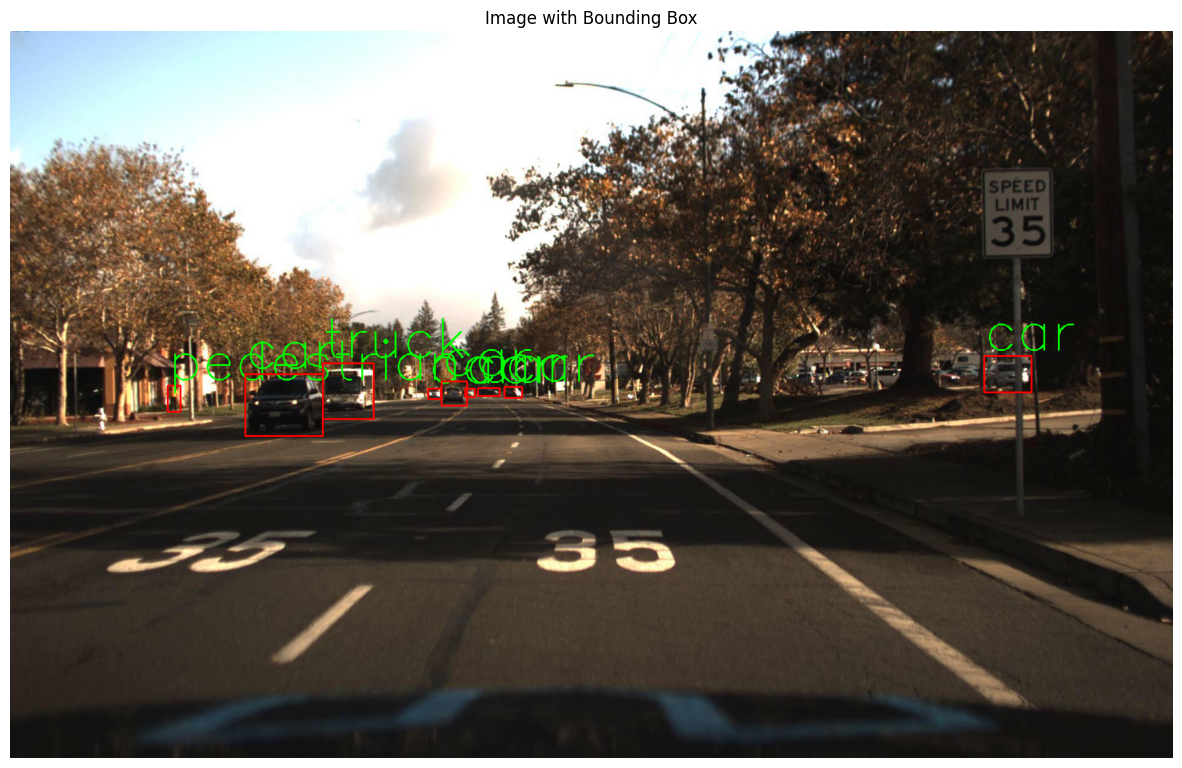

In [ ]:
# Function to plot bounding boxes on an image using image name
def plot_bbox(img_name, annotations):
    # Read the image
    img_path = os.path.join('/content/drive/MyDrive/Self-Driving-Car-2/export', img_name)  # Adjust the path as per your folder structure
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Fetch bounding box annotations for the image from annotations_bbox
    bboxs = annotations[annotations['filename'] == img_name]

    # Draw each bounding box on the image
    for index, row in bboxs.iterrows():
        class_name = row['classname']
        xmin = int(row['xmin'])
        ymin = int(row['ymin'])
        xmax = int(row['xmax'])
        ymax = int(row['ymax'])

        # Draw bounding box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)  # BGR format, so (255, 0, 0) is blue
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, class_name, (xmin, ymin - 10), font, 3, (0, 255, 0), 2)  # Class name

    # Display the image with bounding boxes
    plt.figure(figsize=(15, 10))
    plt.title('Image with Bounding Box')
    plt.imshow(img)
    plt.axis("off")
    plt.show()


plot_bbox('1478019957180061202_jpg.rf.b300a681fb0894be54fe7d8a09b06a10.jpg', df)

In [ ]:
import os
import collections
import pandas as pd
import numpy as np
import functools
import matplotlib.pyplot as plt
import cv2

from sklearn import preprocessing


import xml.etree.ElementTree as ET

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

import torch
import torchvision

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

from torch.utils.data import DataLoader, Dataset
from torch.utils.data import SequentialSampler

In [ ]:
len(df['filename'].unique())

26478

In [ ]:
image_ids = df['filename'].unique()
valid_ids = image_ids[1000:]
train_ids = image_ids[:1000]
len(train_ids)

1000

In [ ]:
valid_df = df[df['filename'].isin(valid_ids)]
train_df = df[df['filename'].isin(train_ids)]
valid_df.shape, train_df.shape

((188390, 9), (7494, 9))

Make dataset by Dataset Module

In [ ]:
!pip install -q albumentations
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
from albumentations import RandomRotate90
from tensorflow.keras import mixed_precision
import gc

In [ ]:
def func(image):
    Trgb2lms =np.array( [
          np.array([17.8824, 43.5161, 4.1194]),
          np.array([3.4557,27.1154, 3.8671]),
          np.array([0.0300, 0.1843, 1.4671])
      ])

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    x,y,z = image.shape
#     print(image.shape)
    cvd_due = np.array([
                     np.array([1 ,0, 0]),
                     np.array([0.494207, 0, 1.24827]),
                     np.array([0, 0, 1]),
    ])
    INV_Trgb2lms = np.linalg.inv(Trgb2lms)

#     print(image.transpose(2, 0, 1).shape)
    out = np.dot(INV_Trgb2lms, cvd_due)
    out = np.dot(out, Trgb2lms)
    out = np.dot(out, image.transpose(2, 0, 1).reshape(3,-1))
    out = out.reshape(3,x,y).transpose(1, 2, 0)
    out = cv2.cvtColor(np.float32(out), cv2.COLOR_RGB2BGR)

    return out

In [ ]:
class VOCDataset(Dataset):

    def __init__(self, dataframe, image_dir, transforms=None):
        self.image_ids = dataframe['filename'].unique()
        self.df = dataframe
        self.image_dir = image_dir
        self.transforms = transforms

    def __getitem__(self, index: int):
        image_id = self.image_ids[index]
        records = self.df[self.df['filename'] == image_id]

        image = cv2.imread(f'{self.image_dir}/{image_id}', cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /= 255.0

        boxes = records[['xmin', 'ymin', 'xmax', 'ymax']].values
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        area = torch.as_tensor(area, dtype=torch.float32)

        labels = torch.as_tensor(records['labels'].values, dtype=torch.int64)

        iscrowd = torch.zeros((records.shape[0],), dtype=torch.int64)

        target = {}
        target['boxes'] = torch.as_tensor(boxes, dtype=torch.float32)
        target['labels'] = labels
        target['image_id'] = torch.tensor([index])
        target['area'] = area
        target['iscrowd'] = iscrowd

        if self.transforms:
            sample = {
                'image': image,
                'bboxes': target['boxes'],
                'labels': labels
            }
            sample = self.transforms(**sample)
            image = sample['image']
            target['boxes'] = torch.stack(tuple(map(torch.tensor, zip(*sample['bboxes'])))).permute(1, 0)

        return image, target

    def __len__(self) -> int:
        return len(self.image_ids)

In [ ]:
def get_transform_train():
    return A.Compose([
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
        ToTensorV2(p=1.0)
    ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

def get_transform_valid():
    return A.Compose([
        ToTensorV2(p=1.0)
    ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

In [ ]:
def collate_fn(batch):
    return tuple(zip(*batch))
IMG_PATH = '/content/drive/MyDrive/Self-Driving-Car-2/export'

train_dataset = VOCDataset(train_df, IMG_PATH , get_transform_train())
valid_dataset = VOCDataset(valid_df, IMG_PATH, get_transform_valid())


# split the dataset in train and test set
indices = torch.randperm(len(train_dataset)).tolist()


train_data_loader = DataLoader(
    train_dataset,
    batch_size=4,
    shuffle=True,
    num_workers=4,
    collate_fn=collate_fn
)

valid_data_loader = DataLoader(
    valid_dataset,
    batch_size=4,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_fn
)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


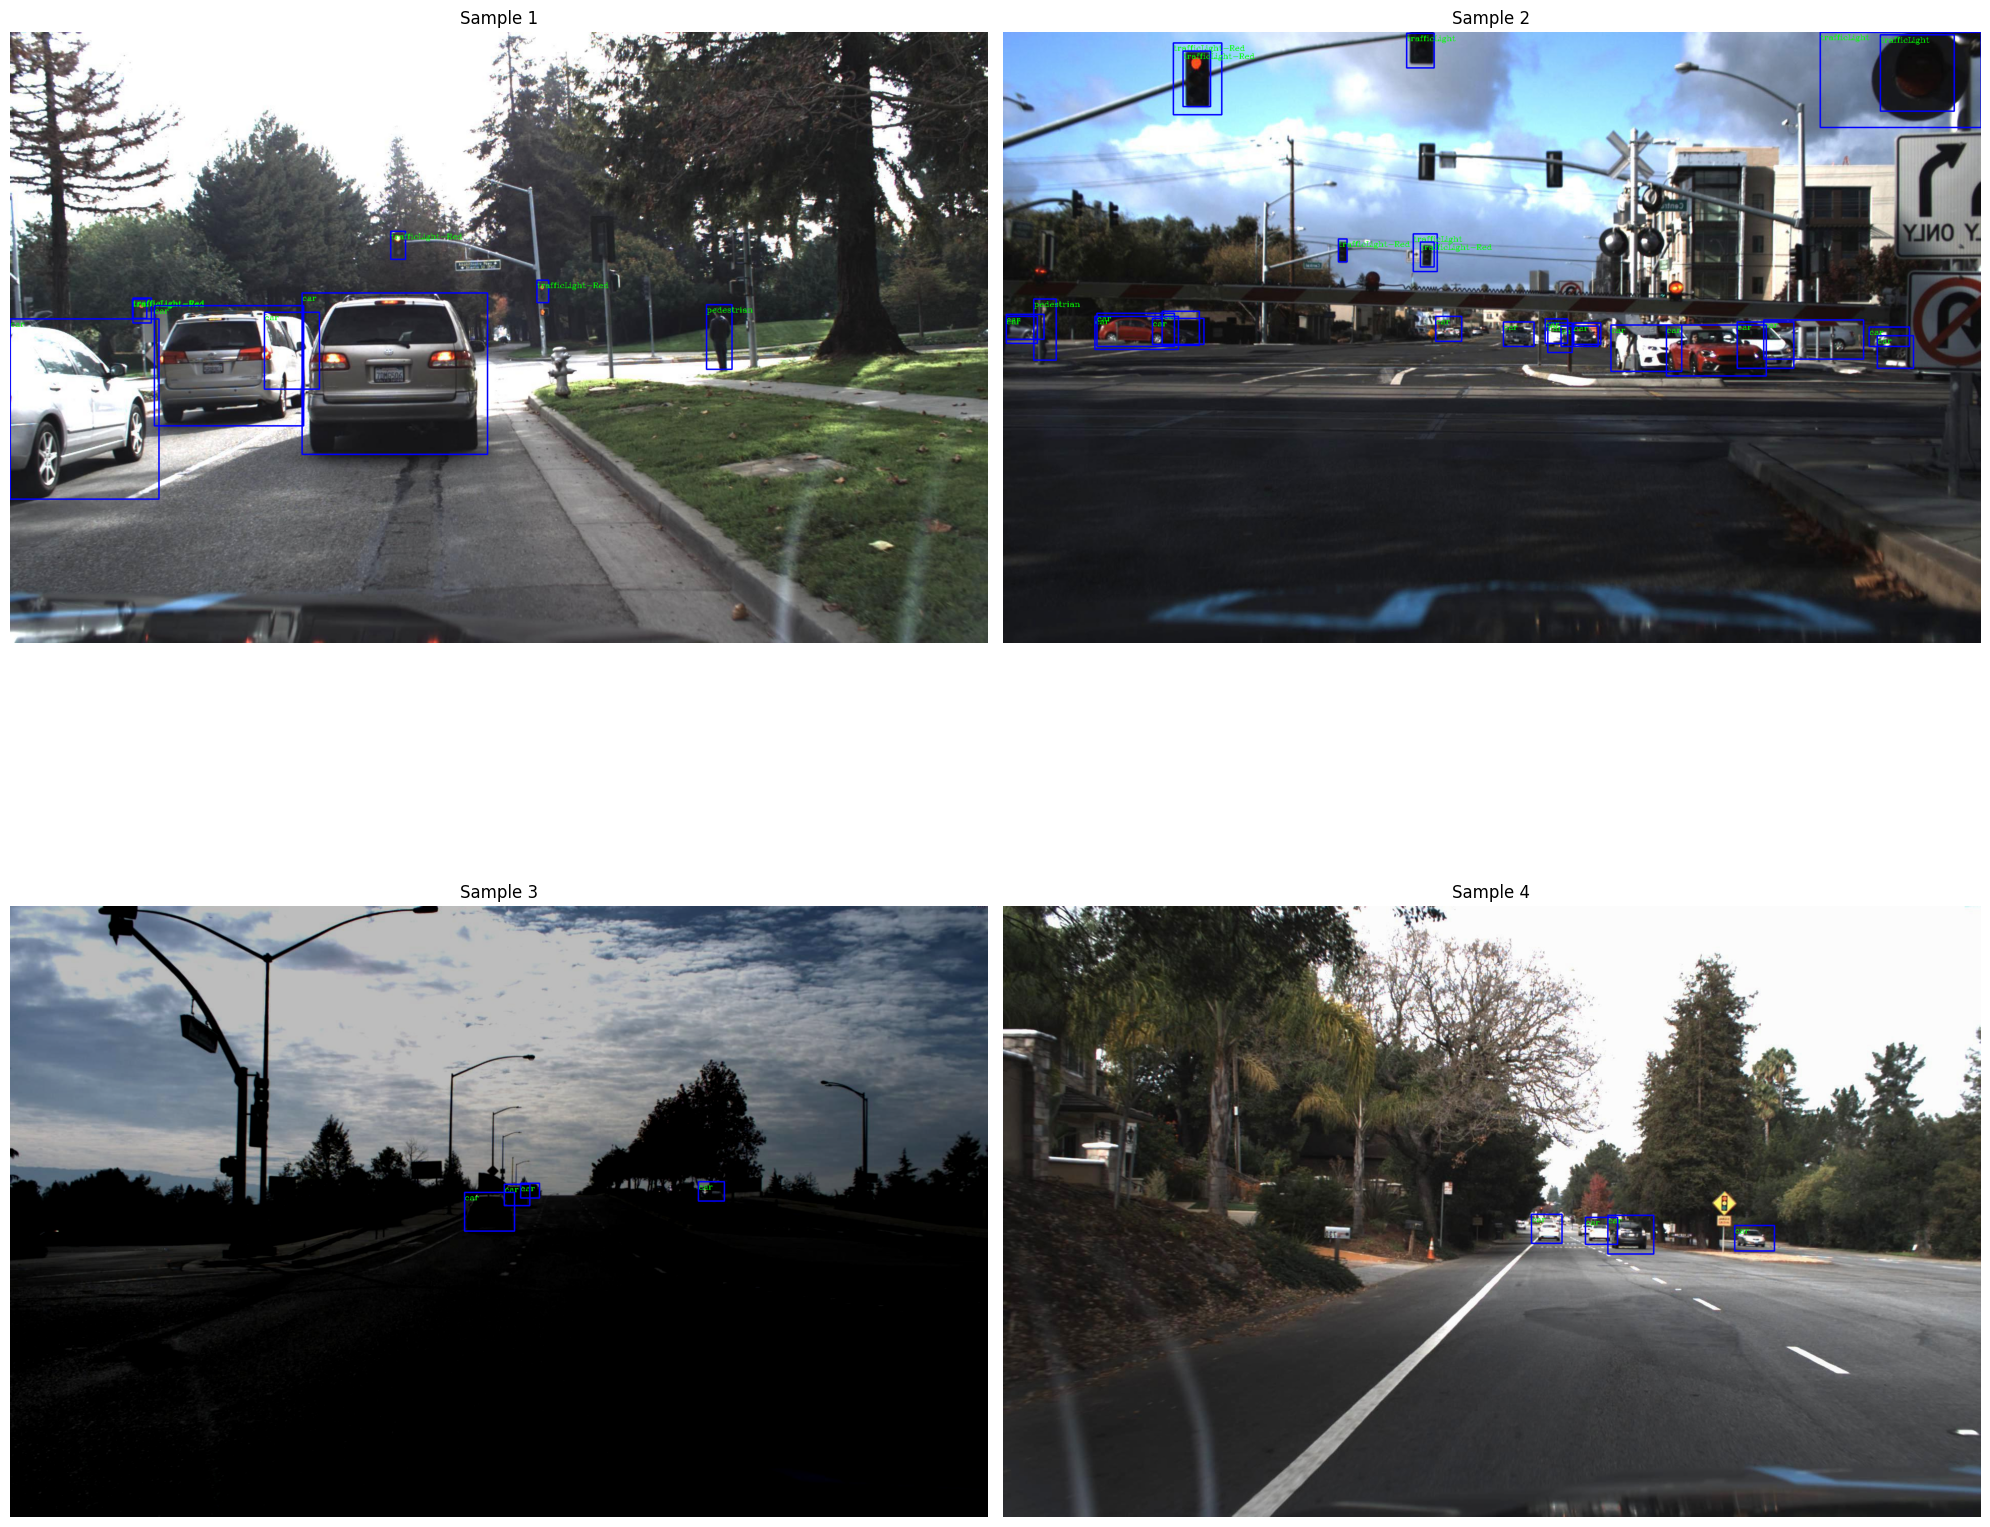

In [ ]:

# Assuming 'device' is defined (e.g., device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Load a batch of data
images, targets = next(iter(train_data_loader))
images = list(image.to(device) for image in images)
targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

plt.figure(figsize=(20, 20))
for i, (image, target) in enumerate(zip(images, targets)):
    plt.subplot(2, 2, i + 1)
    boxes = target['boxes'].cpu().numpy().astype(np.int32)
    sample = image.permute(1, 2, 0).cpu().numpy()
    names = target['labels'].cpu().numpy().astype(np.int64)

    for j, box in enumerate(boxes):
        class_id = names[j]
        class_name = classes.get(class_id, "Unknown")

        cv2.rectangle(sample,
                      (box[0], box[1]),
                      (box[2], box[3]),
                      (0, 0, 220), 2)
        cv2.putText(sample, class_name, (box[0], box[1] + 15),
                    cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 220, 0), 1, cv2.LINE_AA)

    plt.axis('off')
    plt.imshow(sample)
    plt.title(f"Sample {i + 1}")

plt.tight_layout()
plt.show()

Download pretrained model

In [ ]:
# load a model; pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 155MB/s]


In [ ]:
num_classes = 11

# Get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# Replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [ ]:
model.to(device)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [ ]:
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-gzxqj66l
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-gzxqj66l
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=375618 sha256=e2f97f78c4224276ce6467f6272dd0a0b96fd61d00ded385ff5e434d8a447d1a
  Stored in directory: /tmp/pip-ephem-wheel-cache-v9gex2ry/wheels/39/61/b4/480fbddb4d3d6bc34083e7397bc6f5d1381f79acc68e9f3511
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.8
    Uninstalling pycocotools-2.0.8:
      Successfully uninstalled pycocotools-2.0.8


In [ ]:
!git clone https://github.com/pytorch/vision.git
!cd vision;cp references/detection/utils.py ../;cp references/detection/transforms.py ../;cp references/detection/coco_eval.py ../;cp references/detection/engine.py ../;cp references/detection/coco_utils.py ../

Cloning into 'vision'...
remote: Enumerating objects: 535911, done.
remote: Counting objects: 100% (49521/49521), done.
remote: Compressing objects: 100% (2313/2313), done.
remote: Total 535911 (delta 47270), reused 49289 (delta 47123), pack-reused 486390
Receiving objects: 100% (535911/535911), 1.00 GiB | 24.50 MiB/s, done.
Resolving deltas: 100% (500505/500505), done.


In [ ]:
# Import necessary modules
from engine import train_one_epoch, evaluate
import utils

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] ='1'

In [ ]:
%%time
# Define number of epochs
num_epochs = 10

# Train the model
for epoch in range(num_epochs):
    # Train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, train_data_loader, device, epoch, print_freq=10)

    # Update the learning rate scheduler
    lr_scheduler.step()

    # Evaluate on the validation dataset after each epoch if needed
    evaluate(model, valid_data_loader, device=device)


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
torch.save(model.state_dict(), 'faster_rcnn_state.pth')

In [ ]:
# Example evaluation after training
# Define your validation dataset and DataLoader similarly to training
valid_dataset = YourCustomDataset(valid_data, transform=ToTensor())
valid_loader = DataLoader(valid_dataset, batch_size=4, shuffle=False, num_workers=4)

# Evaluate model performance on validation set
evaluate(model, valid_loader, device=device)